In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Mall_Customers.csv')

In [15]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
data.isnull().value_counts()

CustomerID  Genre  Age    Annual Income (k$)  Spending Score (1-100)
False       False  False  False               False                     200
dtype: int64

In [17]:
X = data.iloc[:,[3,4]].values

In [18]:
# finding the optimal number of clusters using the elbow method

In [19]:
from sklearn.cluster import KMeans
wcss_list = []

In [20]:
# using for loop for iterations from 1 to 10

C:\Users\Golden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


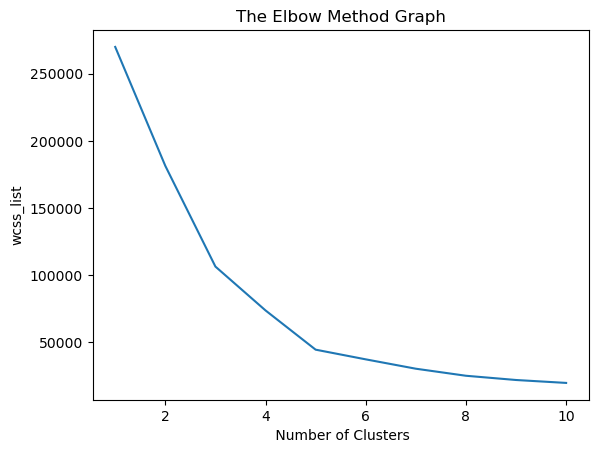

In [21]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel(' Number of Clusters')
plt.ylabel('wcss_list')
plt.show()

In [22]:
# training the k means model on dataset

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(X)

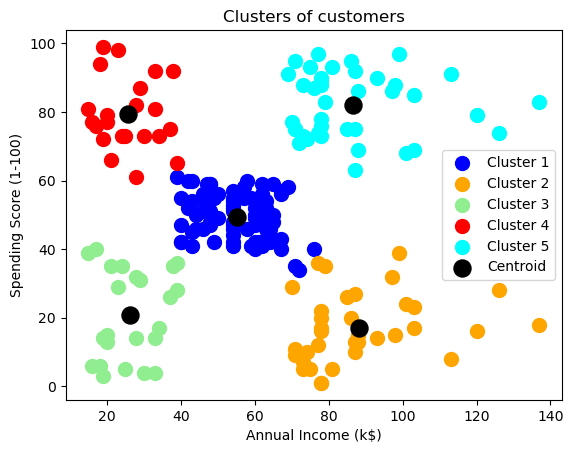

In [24]:
#visualizing the clusters

plt.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 100, c = 'orange', label = 'Cluster 2') #for second cluster
plt.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 100, c = 'lightgreen', label = 'Cluster 3') #for third cluster
plt.scatter(X[y_predict == 3,0], X[y_predict == 3,1], s = 100, c = 'red', label = 'Cluster 4') #for fourth cluster
plt.scatter(X[y_predict == 4,0], X[y_predict == 4,1], s = 100, c = 'cyan', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroid') 

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 